# LangGraph Conditional Path

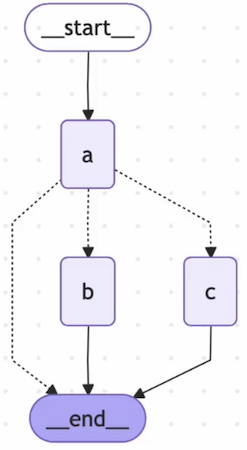

In [1]:
from typing import TypedDict, Literal, Annotated, List
import random
import operator

from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Graph application 

In [25]:
class State(TypedDict):
    """Chat State (message)
    {
        "messages": List[str]
    }
    """
    # Annotated is to add metadata to the data type, which is List here.
    # Annotated[T, metadata, metadata, ...] annotates the date type T with multiple metadata.
    # Metadata is for the LangGraph to inspect/use. Remember, the data itself is List.
    messages: Annotated[    
        List[str],      # State data
        operator.add    # Reducer (metadata)
    ]

graph = StateGraph(State)

## Nodes

In [26]:
def node_a(state: State):
    print("--- Executing Node A ---")
    return State(messages=["processed_by_a"])

def node_b(state: State):
    print("--- Executing Node B ---")
    return State(messages=["processed_by_b"])

def node_c(state: State):
    print("--- Executing Node C ---")
    return State(messages=["processed_by_c"])

# Add nodes
graph.add_node("a", node_a)
graph.add_node("b", node_b)
graph.add_node("c", node_c)

## Wiring

In [27]:
graph.add_edge(START, "a")
graph.add_edge("b", END)
graph.add_edge("c", END)

# Conditional edge from a to b or c
def route_from_a(state: State) -> Literal["b", "c", "end_route"]:
    decision = random.choice(["go_to_b", "go_to_c", "finish"])
    print(f"Decision made: {decision}")
    
    if decision == "go_to_b":
        return "b"
    elif decision == "go_to_c":
        return "c"

    return "end_route"

# Add Conditional Edges (Dotted lines from a)
graph.add_conditional_edges(
    "a",                # The node where the split happens
    route_from_a,       # The function that decides the path
    {                   # The mapping of function output to graph nodes
        "b": "b",
        "c": "c",
        "end_route": END # The dotted line going straight to __end__
    }
)

# Application

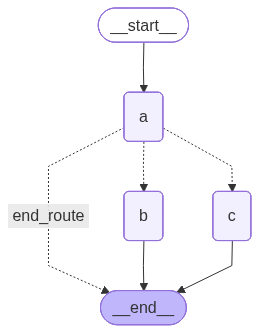

In [28]:
app = graph.compile()

try:
    # If using Jupyter/IPython, you can visualize it:
    # from IPython.display import Image
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [30]:
print("Running Graph:")
app.invoke(State(messages=["initial"]))

Running Graph:
--- Executing Node A ---
Decision made: go_to_c
--- Executing Node C ---


{'messages': ['initial', 'processed_by_a', 'processed_by_c']}